#**COMP 8610 - Final Project**
### *Implementation of UMAP and t-SNE*
---

## **PART 1 - Introduction of t-SNE and UMAP Dimensionality Reduction Techniques.**
---

### ***t-SNE***

T-SNE, short for t-Distributed Stochastic Neighbor Embedding, transforms high-dimensional data into a lower-dimensional space while preserving local structures. It was introduced by Laurens van der Maaten and Geoffrey Hinton in their paper titled "Visualizing Data using t-SNE" (2008).t-SNE works by constructing probability distributions over pairs of high-dimensional data points and similar distributions over pairs of points in the low-dimensional embedding. The algorithm minimizes the divergence between these two distributions, aiming to preserve the local structure of the data. The key steps involved in t-SNE include constructing probability distributions and low-dimensional embedding, then minimizing the divergence between these distributions using stochastic gradient descent.

Although t-SNE is able to provide intuitive and easily interpretable visualizations for complex high-dimensional data, it can be sensitive to the choice of hyperparameters, requiring careful tuning, and there is a potential risk of overfitting when working with small datasets.

**References:**

[1] van der Maaten, L., & Hinton, G. (2008). Visualizing Data using t-SNE. Journal of Machine Learning Research, 2579-2605.

[2] van der Maaten, L. (n.d.). t-SNE webpage. Retrieved from https://lvdmaaten.github.io/tsne/


---



### ***UMAP***

UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that aims to preserve both local and global structure of the data. It was introduced by Leland McInnes, John Healy, and James Melville in their paper titled "UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction" (2018). UMAP utilizes a probabilistic framework to effectively capture complex relationships present in the data by constructing a low-dimensional representation of the data based on a weighted graph. The algorithm works by constructing and optimizing a graph, and finally embedding the data.

UMAP is most accurate when working with large and intricate datasets, as it is able to handle non-linear relationships and high-dimensional data. It also has the capability to preserve the underlying topology of the data, ensuring that the geometric relationships are accurately represented.

**References**

[1] McInnes, L., Healy, J., & Melville, J. (2018). UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction. arXiv preprint arXiv:1802.03426.


---



## **PART 2 - Importing Dependencies and Displaying Dataset.**
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=b720859ad8ee6646145052abbe3dfb7c5e299ecb9b3e6d905ec55ad4f773d004
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=0e32df86679b4ca05caba67c33b80c1d5d5667b240537766e732deabc57ee222
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
%matplotlib inline

***IMPORT DATASET***

In [5]:
data = pd.read_csv('/content/drive/MyDrive/COMP-8610/Final/GSE85241_cellsystems_dataset_4donors_updated.csv',sep='\t', index_col=0)

In [6]:
data

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,1.001958,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.0,0.0
A1CF__chr10,6.071431,0.000000,2.007853,6.071431,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.001958,7.097484,3.017717,0.000000,3.017717,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,2.007853,6.071431,1.001958,6.071431,3.017717,0.0,0.0,0.0,0.0,0.0,...,9.162012,2.007853,2.007853,1.001958,4.031579,2.007853,3.017717,9.162012,0.0,0.0
ZYX__chr7,0.000000,5.049473,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.017717,0.000000,0.000000,0.000000,0.000000,1.001958,8.127667,5.049473,0.0,0.0
ZZEF1__chr17,0.000000,4.031579,1.001958,3.017717,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.007853,0.000000,1.001958,0.000000,4.031579,0.000000,2.007853,3.017717,0.0,0.0


## **PART 3 - Implementation of t-SNE Dimesionality Reduction**
---

***CONSTRUCT THE PROBABILITY DISTRIBUTIONS AND THE LOW-DIMENSIONAL EMBEDDING IN T-SNE***

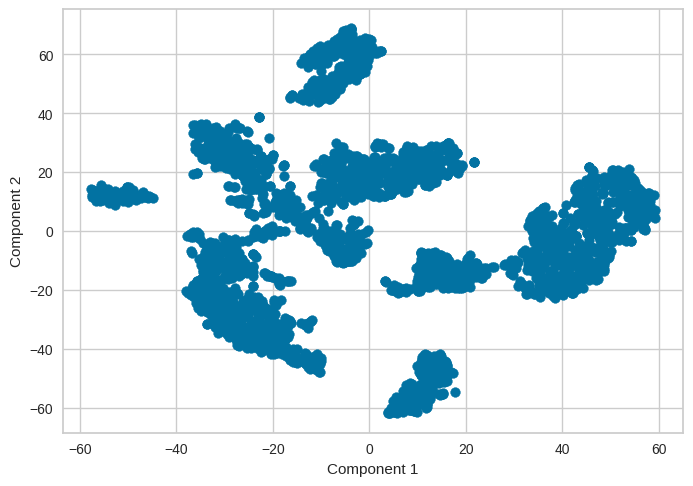

In [7]:
tsne = TSNE(n_components=2)
tsne = tsne.fit_transform(data.T)

plt.scatter(tsne[:, 0], tsne[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


***APPLY KMEANS CLUSTERING AND DISPLAY THE SILHOUETTE SCORE FOR EACH NUMBER OF CLUSTERS***

Num Clusters = 2
Silhouette Score = 0.4129
----------------------------
Num Clusters = 3
Silhouette Score = 0.4644
----------------------------
Num Clusters = 4
Silhouette Score = 0.4416
----------------------------
Num Clusters = 5
Silhouette Score = 0.4651
----------------------------
Num Clusters = 6
Silhouette Score = 0.5034
----------------------------
Num Clusters = 7
Silhouette Score = 0.5325
----------------------------


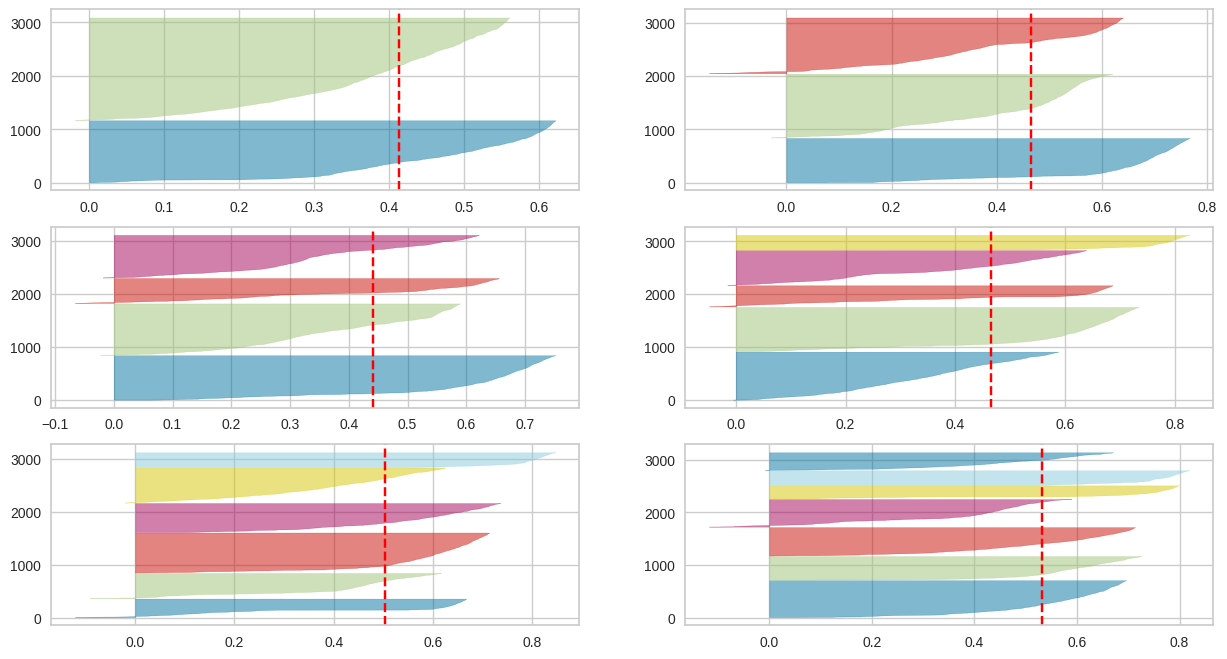

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=100,
                random_state=42)

    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(tsne)

    print(f"Num Clusters = {i}")
    print(f"Silhouette Score = {visualizer.silhouette_score_:0.4f}")
    print("----------------------------")


***CALCULATE THE AVERAGE SILHOUETTE SCORE***

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(tsne)

silhouetteAvg = silhouette_score(tsne, kmeans.labels_)
print('\n\nSilhouette Score Average =', silhouetteAvg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




Silhouette Score Average = 0.4417124


***CREATE A SCATTER PLOT USING THE T-SNE TRANSFORMED DATA AND ASSIGN COLOURS TO THE POINTS BASED ON THE CLUSTER LABELS ASSIGNED BY THE K-MEANS CLUSTERING ALGORITHM.***

<ipython-input-10-ac63cafcba4c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


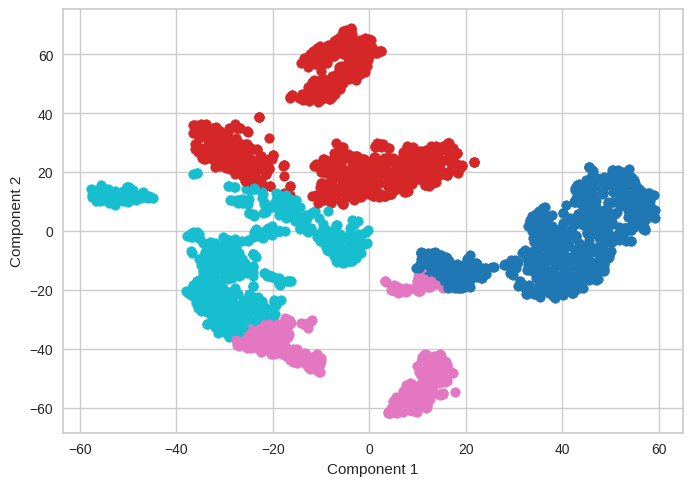

In [10]:
n_clusters = 4
colors = plt.cm.get_cmap('tab10', n_clusters)

fig, ax = plt.subplots()
for i in range(len(kmeans.labels_)):
    ax.scatter(tsne[i, 0],
               tsne[i, 1],
               color = colors(kmeans.labels_[i]))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

***PERFORM THE K-MEANS CLUSTERING ALGORITHM AND USE THE ELBOW METHOD TO DETERMINE THE OPTIMAL NUMBER OF CLUSTERS FOR THE T-SNE TRANSFORMED DATA.***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

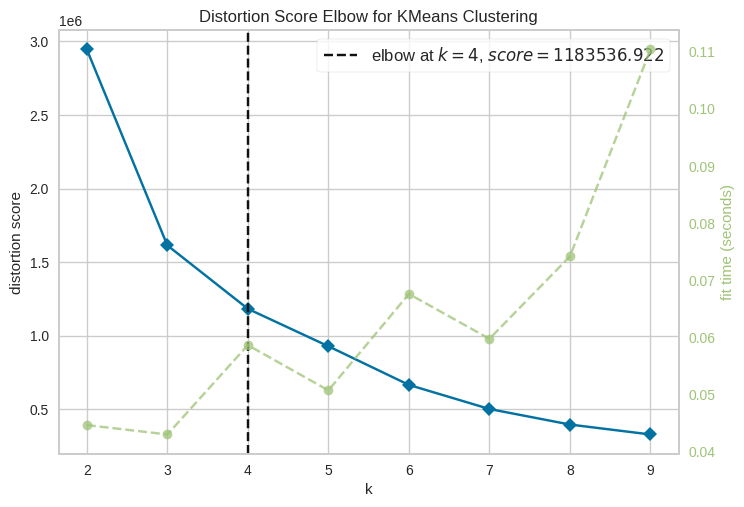

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(tsne)
visualizer.show()

## **PART 4 - Implementation of UMAP Dimesionality Reduction**
---

***APPLY UMAP AND VISUALIZE THE TRANSFORMED DATA IN A SCATTER PLOT.***

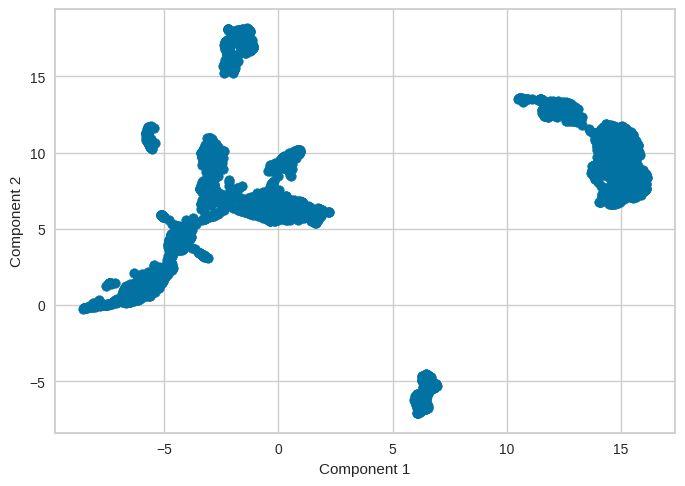

In [21]:
umap = UMAP(n_components=2)
umap = umap.fit_transform(data.T)

plt.scatter(umap[:, 0], umap[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

***APPLY KMEANS CLUSTERING AND DISPLAY THE SILHOUETTE SCORE FOR EACH NUMBER OF CLUSTERS***

Num Clusters = 2
Silhouette Score = 0.6266
----------------------------
Num Clusters = 3
Silhouette Score = 0.6783
----------------------------
Num Clusters = 4
Silhouette Score = 0.6713
----------------------------
Num Clusters = 5
Silhouette Score = 0.6809
----------------------------
Num Clusters = 6
Silhouette Score = 0.6802
----------------------------
Num Clusters = 7
Silhouette Score = 0.6029
----------------------------


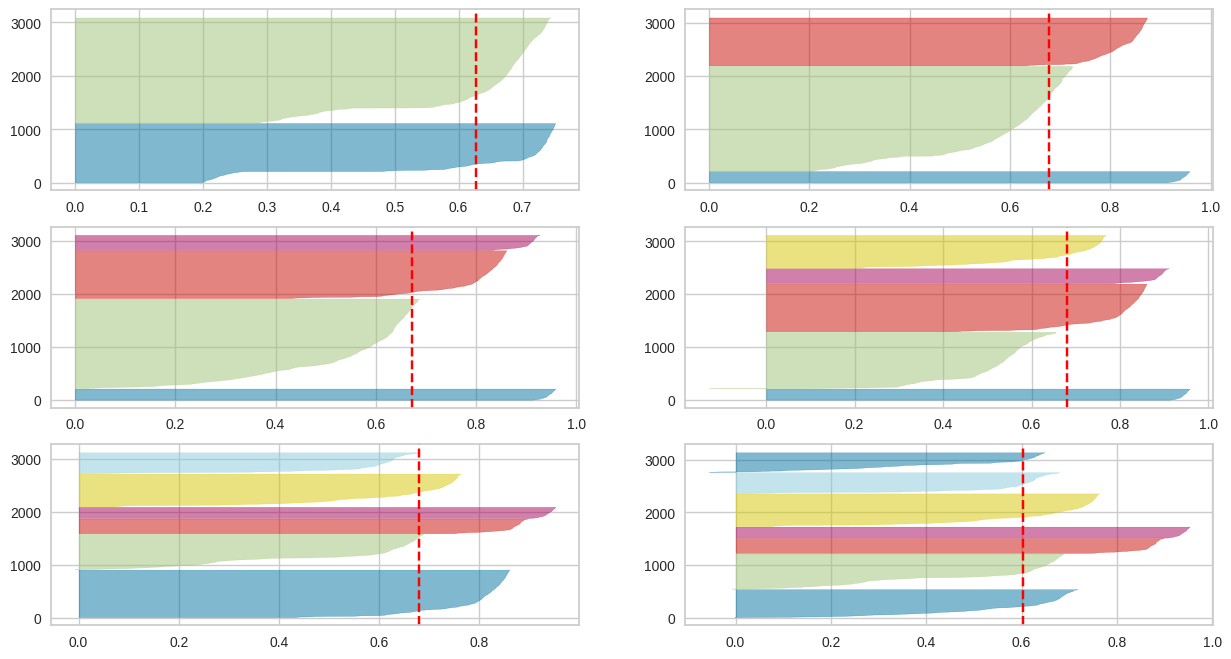

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=100,
                random_state=42)

    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(umap)

    print(f"Num Clusters = {i}")
    print(f"Silhouette Score = {visualizer.silhouette_score_:0.4f}")
    print("----------------------------")

***CALCULATE THE AVERAGE SILHOUETTE SCORE.***

In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(umap)

silhouetteAvg = silhouette_score(umap, kmeans.labels_)
print('\n\nSilhouette Score Average = ', silhouetteAvg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




Silhouette Score Average =  0.62660885


***CREATE A SCATTER PLOT USING THE UMAP TRANSFORMED DATA AND ASSIGN COLOURS TO THE POINTS BASED ON THE CLUSTER LABELS ASSIGNED BY THE K-MEANS CLUSTERING ALGORITHM.***

<ipython-input-18-f6ca0bea6de1>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


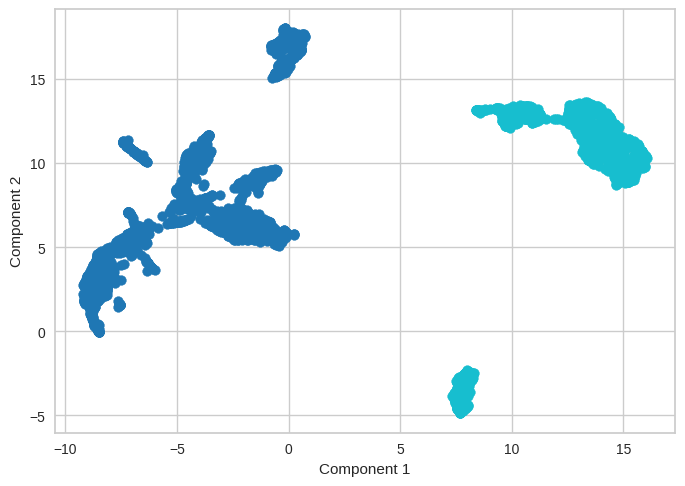

In [18]:
n_clusters = 2
colors = plt.cm.get_cmap('tab10', n_clusters)

fig, ax = plt.subplots()
for i in range(len(kmeans.labels_)):
    ax.scatter(umap[i, 0], umap[i, 1], color=colors(kmeans.labels_[i]))

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

***PERFORM THE K-MEANS CLUSTERING ALGORITHM AND USE THE ELBOW METHOD TO DETERMINE THE OPTIMAL NUMBER OF CLUSTERS FOR THE UMAP TRANSFORMED DATA.***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

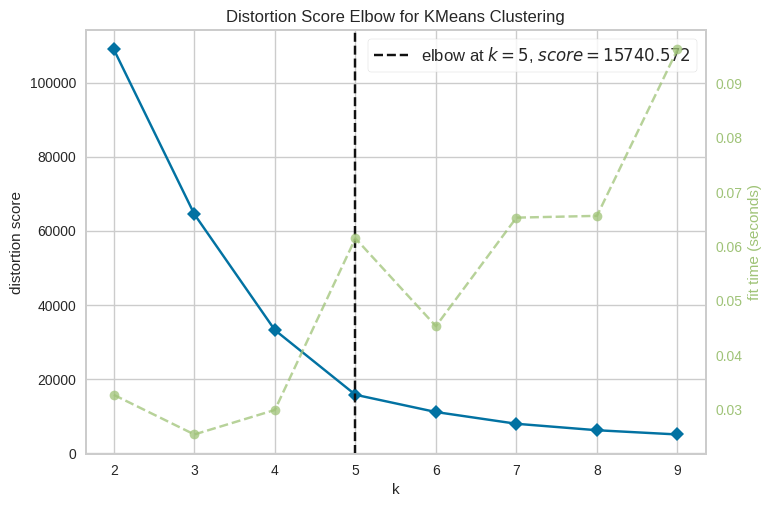

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(umap)
visualizer.show()